In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 3981 bytes


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Demo of DBSCAN clustering algorithm

In [3]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(X)

In [4]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)                       #Return an array of zeros with the same shape and type as a given array
core_samples_mask[db.core_sample_indices_] = True                               #Indices of core samples.
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


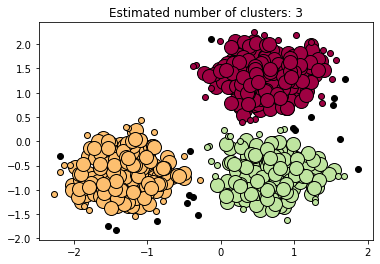

In [5]:
# Plot result
# Black removed and is used for noise instead.

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]   #Return evenly spaced numbers over a specified interval, Set the colormap to spectral
for k, col in zip(unique_labels, colors):                                            #Zip Join two lists together
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]                              
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Perform clustering & observe the relationship between Spend Score vs Annual Income by using DBScan

In [6]:
df=pd.read_csv('Mall_Customers.csv')

In [7]:
df = df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'})

In [8]:
df.sample(5)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
8,9,Male,64,19,3
74,75,Male,59,54,47
130,131,Male,47,71,9
194,195,Female,47,120,16
25,26,Male,29,28,82


In [9]:
df.shape

(200, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

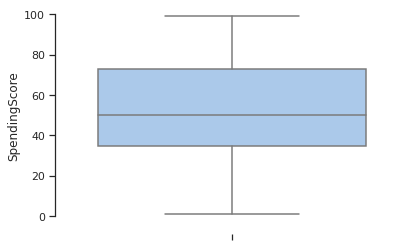

In [13]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y='SpendingScore',data=df)
sns.despine(offset=10, trim=True)

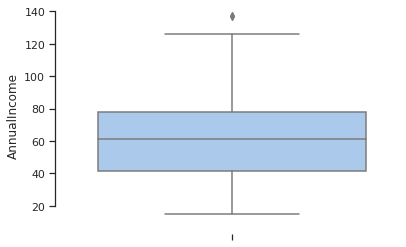

In [14]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y='AnnualIncome',data=df)
sns.despine(offset=10, trim=True)

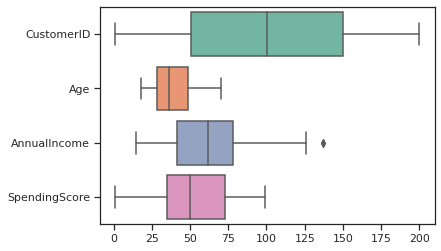

In [15]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [16]:
outliner_annualIncome = df.loc[(df['AnnualIncome'] > 125)]
outliner_annualIncome

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Text(0, 0.5, 'Spendscore')

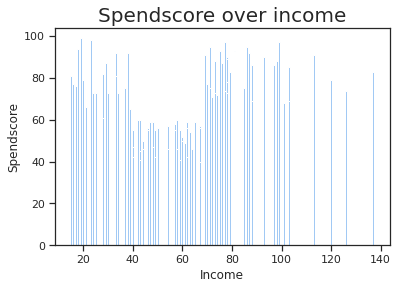

In [17]:
plt.bar(df['AnnualIncome'],df['SpendingScore'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

In [18]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
x=df.iloc[:,[3,4]].values  #column 3 & column 4

In [20]:
x.shape

(200, 2)

In [21]:
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(x)
label=model.labels_

In [34]:
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters
n_clusters=len(set(label))- (1 if -1 in label else 0)
n_noise_ = list(label).count(-1)
print('No of clusters:',n_clusters)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, label))

No of clusters: 9
Estimated number of noise points: 121
Silhouette Coefficient: -0.191


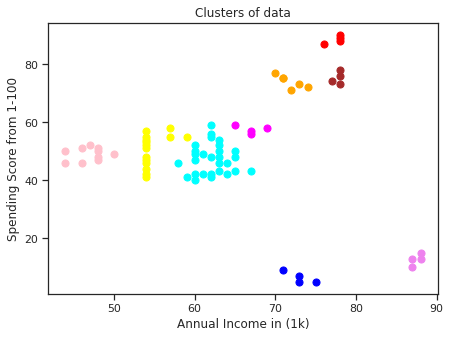

In [35]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'brown')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()


In [36]:
def DBscan(eps_,min_sample_,X_):
    dbscan = DBSCAN(eps = eps_,min_samples = min_sample_, metric='euclidean').fit(X_)
    label = dbscan.labels_
    sample_cores=np.zeros_like(label,dtype=bool)
    sample_cores[dbscan.core_sample_indices_]=True
    n_clusters = len(set(label))- (1 if -1 in label else 0)
    silhouetteCoef = metrics.silhouette_score(x, label)
    #mask = np.arange(len(dbscan.core_sample_indices_))
    #for idx,i in enumerate(dbscan.core_sample_indices_):
        #mask[idx]  = dbscan.labels_[i]
    y_means = dbscan.fit_predict(x)
    for i in range(n_clusters):
      plt.scatter(x[y_means == i, 0], x[y_means == i, 1], s = 50, c = color[i])
    plt.xlabel('Annual Income in (1k)')
    plt.ylabel('Spending Score from 1-100')
    #plt.scatter(dbscan.components_[:,0],dbscan.components_[:,1],c = mask)
    plt.title("eps = {}, min_samples = {} ,no. of clusters = {}, Silhouette Coefficient = {:0.3f}".format(eps_, min_sample_, n_clusters, silhouetteCoef))

color = ['pink', 'yellow', 'cyan', 'magenta', 'orange', 'blue', 'red', 'brown', 'violet'] 

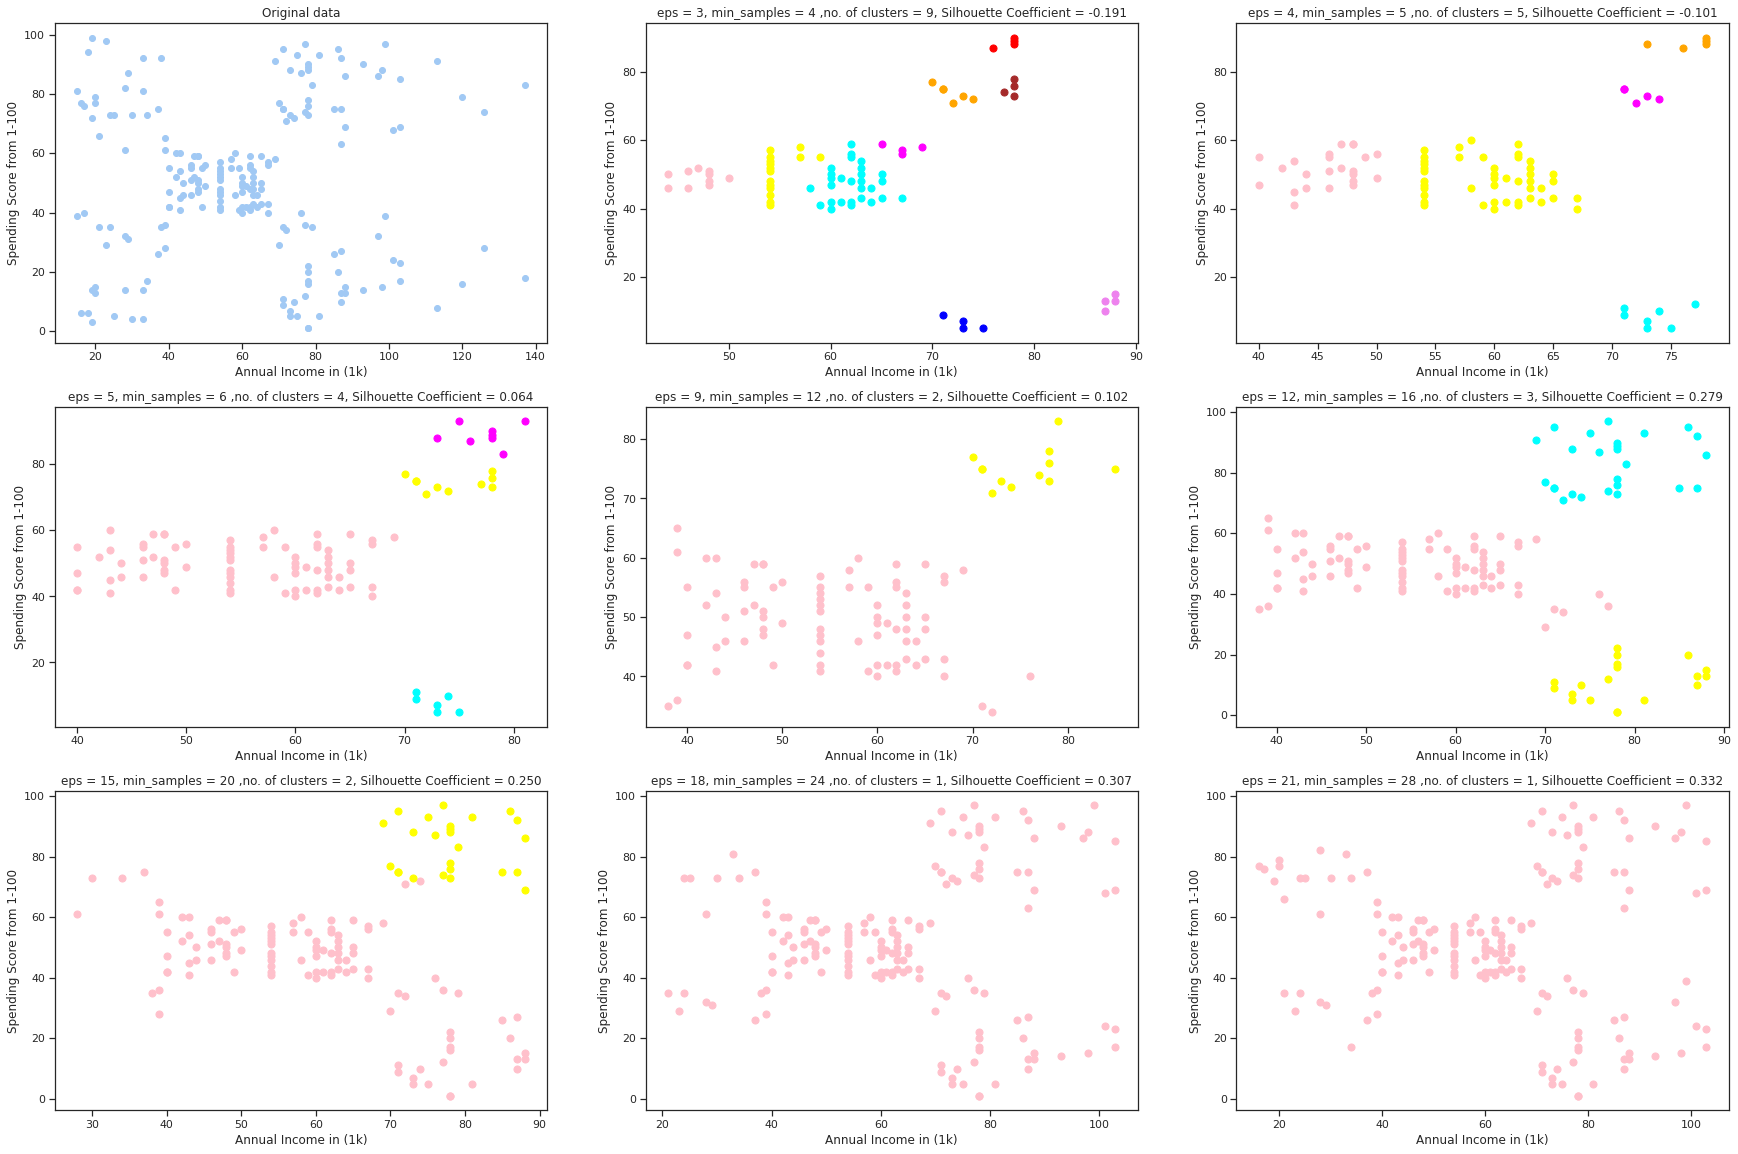

In [47]:
plt.figure(figsize = (30,20))

plt.subplot(331)
plt.scatter(x[:,0],x[:,1])
plt.title("Original data")
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')

plt.subplot(332)
DBscan(3,4,x)

plt.subplot(333)
DBscan(4,5,x)

plt.subplot(334)
DBscan(5,6,x)

plt.subplot(335)
DBscan(9,12,x)

plt.subplot(336)
DBscan(12,16,x)

plt.subplot(337)
DBscan(15,20,x)

plt.subplot(338)
DBscan(18,24,x)

plt.subplot(339)
DBscan(21,28,x)

plt.show()

In [38]:
def clusterVSsilhouetteCoef(eps_,min_sample_,X_):
    dbscan = DBSCAN(eps = eps_,min_samples = min_sample_, metric='euclidean').fit(X_)
    label = dbscan.labels_
    sample_cores=np.zeros_like(label,dtype=bool)
    sample_cores[dbscan.core_sample_indices_]=True
    n_clusters = len(set(label))- (1 if -1 in label else 0)
    if n_clusters >= 1:
      silhouetteCoef = metrics.silhouette_score(x, label)
      print("eps = {}, min_samples = {} ,no. of clusters = {}, Silhouette Coefficient = {:0.3f}".format(eps_, min_sample_, n_clusters, silhouetteCoef))
      #return n_clusters, silhouetteCoef

In [45]:
original_eps = 1
original_min_sample = 1
for i in range(30):
  clusterVSsilhouetteCoef(original_eps + i, original_min_sample + i,x)

eps = 1, min_samples = 1 ,no. of clusters = 170, Silhouette Coefficient = 0.147
eps = 2, min_samples = 2 ,no. of clusters = 33, Silhouette Coefficient = -0.068
eps = 3, min_samples = 3 ,no. of clusters = 11, Silhouette Coefficient = -0.137
eps = 4, min_samples = 4 ,no. of clusters = 8, Silhouette Coefficient = -0.014
eps = 5, min_samples = 5 ,no. of clusters = 5, Silhouette Coefficient = 0.114
eps = 6, min_samples = 6 ,no. of clusters = 6, Silhouette Coefficient = 0.154
eps = 7, min_samples = 7 ,no. of clusters = 5, Silhouette Coefficient = 0.177
eps = 8, min_samples = 8 ,no. of clusters = 4, Silhouette Coefficient = 0.231
eps = 9, min_samples = 9 ,no. of clusters = 6, Silhouette Coefficient = 0.208
eps = 10, min_samples = 10 ,no. of clusters = 4, Silhouette Coefficient = 0.304
eps = 11, min_samples = 11 ,no. of clusters = 4, Silhouette Coefficient = 0.328
eps = 12, min_samples = 12 ,no. of clusters = 4, Silhouette Coefficient = 0.343
eps = 13, min_samples = 13 ,no. of clusters = 3, Si

In [46]:
original_eps = 1
original_min_sample = original_eps + 1
for i in range(30):
  clusterVSsilhouetteCoef(original_eps + i, original_min_sample + i,x)

eps = 1, min_samples = 2 ,no. of clusters = 21, Silhouette Coefficient = -0.370
eps = 2, min_samples = 3 ,no. of clusters = 11, Silhouette Coefficient = -0.295
eps = 3, min_samples = 4 ,no. of clusters = 9, Silhouette Coefficient = -0.191
eps = 4, min_samples = 5 ,no. of clusters = 5, Silhouette Coefficient = -0.101
eps = 5, min_samples = 6 ,no. of clusters = 4, Silhouette Coefficient = 0.064
eps = 6, min_samples = 7 ,no. of clusters = 4, Silhouette Coefficient = 0.134
eps = 7, min_samples = 8 ,no. of clusters = 5, Silhouette Coefficient = 0.152
eps = 8, min_samples = 9 ,no. of clusters = 4, Silhouette Coefficient = 0.159
eps = 9, min_samples = 10 ,no. of clusters = 5, Silhouette Coefficient = 0.165
eps = 10, min_samples = 11 ,no. of clusters = 5, Silhouette Coefficient = 0.255
eps = 11, min_samples = 12 ,no. of clusters = 3, Silhouette Coefficient = 0.302
eps = 12, min_samples = 13 ,no. of clusters = 3, Silhouette Coefficient = 0.320
eps = 13, min_samples = 14 ,no. of clusters = 4, Si

In [41]:
db_final=DBSCAN(eps=13,min_samples=14,metric='euclidean').fit(x)
label_final=db_final.labels_
label_final

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0,  1,  0,  1, -1, -1,  0, -1, -1,
       -1,  0, -1,  0,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  2,  1,  2,  3,  2,  3,  2,  1,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  1,  2,  3,  2,  1,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  1,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [42]:
df_final = df
df_final['label']= label_final
temp = df_final.pivot_table(index=['label'], values='CustomerID', aggfunc='count')
temp.rename(columns={'CustomerID': 'Count of Customer per Cluster'})

,Count of Customer per Cluster
label,
-1,40
0,15
1,91
2,31
3,23


In [43]:
df_final.groupby('label').agg({'Age':'mean','AnnualIncome':'mean','SpendingScore':'mean'})

,Age,AnnualIncome,SpendingScore
label,,,
-1,38.550000,61.100000,41.800000
0,24.933333,24.466667,74.600000
1,42.791209,54.439560,47.956044
2,32.645161,80.161290,83.580645
3,41.217391,80.956522,12.782609


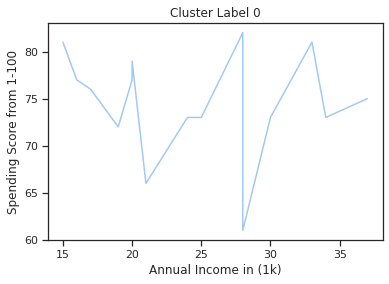

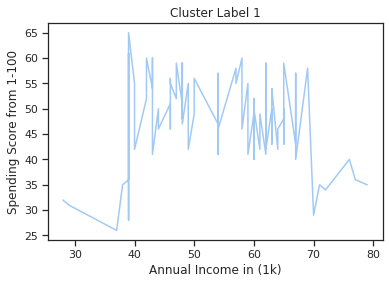

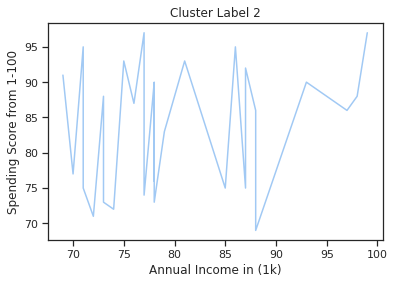

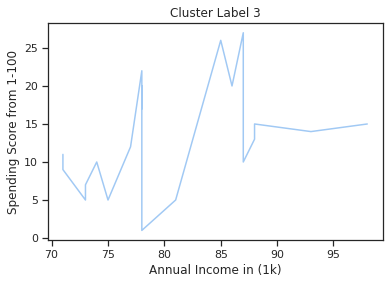

In [63]:
for i in (0,1,2,3):
  df_final[(df_final['label']==i)]
  p = df_final[(df_final['label']==i)]['AnnualIncome']
  q = df_final[(df_final['label']==i)]['SpendingScore']
  plt.title('Cluster Label ' + str(i))
  plt.xlabel('Annual Income in (1k)')
  plt.ylabel('Spending Score from 1-100')
  plt.plot(p, q)
  plt.show()

In [48]:
df_final[(df_final['label']==0)]

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,label
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
9,10,Female,30,19,72,0
13,14,Female,24,20,77,0
15,16,Male,22,20,79,0
17,18,Male,20,21,66,0
21,22,Male,25,24,73,0
23,24,Male,31,25,73,0
25,26,Male,29,28,82,0
